# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Неполное среднее', 'Ученая степень', 'Два и более высших образования', 'Неоконченное высшее', 'Высшее', 'Среднее специальное'}


MARITAL_STATUS
{'Состою в браке', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Другие сферы', 'Банк/Финансы', 'Информационные технологии', 'Страхование', 'Государственная служба', 'Салоны красоты и здоровья', 'Транспорт', 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение', 'ЧОП/Детективная д-ть', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Здравоохранение', 'Образование', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Сельское хозяйство', 'Строительство', 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Нефтегазовая промышленность', 'Сборочные производства', 'Маркетинг', 'Торговля', 'Информационные услуги', 'Энергетика', 'Развлечения/Искусство', 'Наука', 'Подбор персонала', 'Управляющая компания'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

#### Перечень полей в которых пропущенны данные

Поле                          |Не пустые значения   |Тип
:-----------------------------|:-------------------:|------:
GEN_INDUSTRY                  |27420 non-null       |object 
GEN_TITLE                     |27420 non-null       |object
ORG_TP_STATE                  |27420 non-null       |object
ORG_TP_FCAPITAL               |27425 non-null       |object
JOB_DIR                       |27420 non-null       |object
TP_PROVINCE                   |29543 non-null       |object
WORK_TIME                     |27416 non-null       |float64
PREVIOUS_CARD_NUM_UTILIZED    |600 non-null         |float64

Первые 6 полей из таблицы категориальные,связанные с характеристикой среды, в которой работает заемщик и его позиции, их не получится восстановить (дозаполнить) по имеющимся данным, как и время работы на текущем месте (7-е поле).Предлагается убрать записи с пустыми значениями по этим полям. Потери в данных будут меньше, например, четверти, при этом выпадание целевой переменной (TARGET=1 - случаи просрочки) и того меньше. Последнее поле свидетельствует об использовании заемщиком карт этого банка ранее (у карты ограниченный срок действия), соответственно столь масштабные пропуски значений в этом случае говорят о том, что карт этого банка у заемщика раньше не было и все пропуски предлагается заменить на 0 (изначально в поле нет нулей, есть только пропуски и значения 1 или 2).


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

#### Категориальные признаки

Поле                          |Тип     
:-----------------------------|------------:
SOCSTATUS_WORK_FL             |int64
SOCSTATUS_PENS_FL             |int64
GENDER                        |int64
EDUCATION                     |object
MARITAL_STATUS                |object
GEN_INDUSTRY                  |object
GEN_TITLE                     |object
ORG_TP_STATE                  |object
ORG_TP_FCAPITAL               |object
JOB_DIR                       |object
FAMILY_INCOME                 |object
REG_ADDRESS_PROVINCE          |object
FACT_ADDRESS_PROVINCE         |object
POSTAL_ADDRESS_PROVINCE       |object
TP_PROVINC                    |object
REGION_NM                     |object
REG_FACT_FL                   |int64
FACT_POST_FL                  |int64
REG_POST_FL                   |int64
REG_FACT_POST_FL	          |int64
REG_FACT_POST_TP_FL           |int64
FL_PRESENCE_FL                |int64
AUTO_RUS_FL                   |int64
HS_PRESENCE_FL                |int64
COT_PRESENCE_FL               |int64
GAR_PRESENCE_FL               |int64
LAND_PRESENCE_FL              |int64
DL_DOCUMENT_FL                |int64
GPF_DOCUMENT_FL               |int64
FACT_PHONE_FL                 |int64
REG_PHONE_FL	              |int64
GEN_PHONE_FL                  |int64

Все целочисленные категориальные признаки оставляем как есть, с ними ничего делать не надо.**EDUCATION** переводим в целочисленное значение через присвоение индекса: **Неполное среднее** - 0, **Среднее** - 1, **Среднее специальное** - 2, **Неоконченное высшее** - 3, **Высшее** - 4, **Два и более высших образования** - 5, **Ученая степень** - 6 (в этом случае есть определенная иерархия и нет смысла умножать количество признаков). Аналогично поступаем с **FAMILY_INCOME**: **до 5000 руб.** - 0, **от 5000 до 10000 руб.** - 1, **от 10000 до 20000 руб.** - 2, **от 20000 до 50000 руб.** - 3, **свыше 50000 руб.** - 4. **REGION_NM** - этот столбец убираем, потому что это объединение по макрорегионам тех офисов, где клиент брал кредит и в этом смысле информация в дополнение к **TP_PROVINC** избыточная.Также из нескольких адресов клиента (регистрации, фактического проживания, почтового) предлагается сохранить только фактического проживания (**FACT_ADDRESS_PROVINCE**), потому что есть переменные, которые характеризуют расхождение адресов (**REG_FACT_FL**, **FACT_POST_FL**, **REG_POST_FL**, **REG_FACT_POST_FL**, **REG_FACT_POST_TP_FL**), что, наверное, важно при выявлении фактов мошеничества и держать одновременно регионы всех трех адресов избыточно, т.е. **REG_ADDRESS_PROVINCE** и **POSTAL_ADDRESS_PROVINCE** предлагается удалить, по **FACT_ADDRESS_PROVINCE** и **TP_PROVINCE** воспользоваться one-hot encoding после устранения пропусков. По **MARITAL_STATUS**, **GEN_INDUSTRY**, **GEN_TITLE**, **ORG_TP_STATE**, **ORG_TP_FCAPITAL**, **JOB_DIR** (семейное положения и информация про работу и работодателя) также воспользоваться one-hot encoding после удаления пропусков.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    return df_output

In [14]:
#Функция удаления строк с пустыми значениями полей (на всякий случай введено ограничение, что доля пустых полей не больше 75%)
def preproc_data_nan(df_input):
    df_output = df_input.copy()
    for i in df_output.columns:
        l = df_output[~df_output[i].isnull()][i].count()
        m = df_output.shape[0]
        if m > l > 0.75*m:
            df_output = df_output[~df_output[i].isnull()]
    return df_output

#Функция замены пустых элементов на нули по указанному столбцу (a)
def preproc_data_0(df_input, a):
    df_output = df_input.copy()
    df_output[a] = df_output[a].fillna(0)
    return df_output

#Функция удаления столбцов заданных списком (d)
def preproc_data_dell(df_input, d):
    df_output = df_input.copy()
    df_output = df_output.drop(d, axis=1)
    return df_output

#Функция замены строкового формата на числовой по выбранному списку столбцов (f)
def preproc_data_float(df_input, f):
    df_output = df_input.copy()
    for i in f:
        if str(df_output[i].dtype) == 'object':
            df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    return df_output

#Функция индексирующая категориальные переменные в заданном столбце (b) по заданному списку (nd)
def preproc_data_ind(df_input, b, nd):
    df_output = df_input.copy()
    df_output[b]= df_output[b].map(lambda x: nd.index(x))   
    return df_output

#Функция создания дамми переменных по указанному списку столбцов (g)
def preproc_data_dumm(df_input, g):
    df_output = df_input.copy()
    df_output = pd.get_dummies(df_output, columns=g)
    return df_output


df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [15]:
a = 'PREVIOUS_CARD_NUM_UTILIZED' #Столбец в котором пропуски заменяются нулями
d = ['AGREEMENT_RK', 'REGION_NM', 'REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE'] #Столбцы которые надо удалить
f = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'] #Столбцы которые надо перевести в числовой формат
b = 'EDUCATION' #Столбец в котором надо проиндексировать категориальные признаки
nd = ['Неполное среднее', 'Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее', 'Два и более высших образования', 'Ученая степень'] #Категории в порядке возрастания индекса
b1 = 'FAMILY_INCOME' #Еще столбец в котором надо проиндексировать категориальные признаки
nd1 = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'свыше 50000 руб.'] #Категории в порядке возрастания индекса
g = ['MARITAL_STATUS', 'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR'] #Перечень столбцов по которым надо сформировать дами переменные

df_preproc = (df.pipe(preproc_data_nan)
              .pipe(preproc_data_0, a)
              .pipe(preproc_data_dell, d)
              .pipe(preproc_data_float, f)
              .pipe(preproc_data_ind, b, nd)
              .pipe(preproc_data_ind, b1, nd1)
              .pipe(preproc_data_dumm, g))

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [16]:
df_train_preproc.info() #Только числовые значения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13569 entries, 14910 to 30132
Columns: 257 entries, TARGET to JOB_DIR_Юридическая служба
dtypes: float64(7), int64(33), uint8(217)
memory usage: 7.1 MB


In [17]:
df_test_preproc.info() #Только числовые значения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13271 entries, 0 to 14909
Columns: 257 entries, TARGET to JOB_DIR_Юридическая служба
dtypes: float64(7), int64(33), uint8(217)
memory usage: 6.9 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [18]:
X = df_train_preproc.drop(['TARGET'], axis = 1)
X_test_out = df_test_preproc.drop(['TARGET'], axis = 1) #Переименовал, что это внешнии тестовые признаки (чтоб не было пересечений с заданиями ниже)

In [19]:
y = df_train_preproc['TARGET']
y_test_out = df_test_preproc['TARGET'] #Переименовал, что это внешнии тестовые значения (чтоб не было пересечений с заданиями ниже)

#### Задание 5. Обучение и оценка качества разных моделей

In [21]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [23]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [24]:
model_D = DecisionTreeClassifier()
model_D.fit(X_train, y_train)
predict_D = model_D.predict(X_test)
predict_proba_D = model_D.predict_proba(X_test)

model_R = RandomForestClassifier(random_state = 42) #Чтоб результат не "скакал"
model_R.fit(X_train, y_train)
predict_R = model_R.predict(X_test)
predict_proba_R = model_R.predict_proba(X_test)

model_L = LogisticRegression()
model_L.fit(X_train, y_train)
predict_L = model_L.predict(X_test)
predict_proba_L = model_L.predict_proba(X_test)

In [25]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [26]:
accuracy_score_D = accuracy_score(y_test, predict_D)
accuracy_score_R = accuracy_score(y_test, predict_R)
accuracy_score_L = accuracy_score(y_test, predict_L)

precision_score_D = precision_score(y_test, predict_D)
precision_score_R = precision_score(y_test, predict_R)
precision_score_L = precision_score(y_test, predict_L)

recall_score_D = recall_score(y_test, predict_D)
recall_score_R = recall_score(y_test, predict_R)
recall_score_L = recall_score(y_test, predict_L)

print('ACCURACY:', 'DecisionTreeClassifier -', accuracy_score_D, ';', 'RandomForestClassifier -', accuracy_score_R, ';', 'LogisticRegression -', accuracy_score_L)

ACCURACY: DecisionTreeClassifier - 0.7862932940309506 ; RandomForestClassifier - 0.8776713338246132 ; LogisticRegression - 0.8796364529599607


Если делать заключение только по доле верных предсказаний (Accurase), то предпочтительней LogisticRegression. Но в целом ориентироваться на него неверно, потому что доля неплатежей не велика и их изменение в ту или другую сторону может теряться на общем количестве выданных кредитов.

In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

Text(0.5,1,'Сравнение моделей')

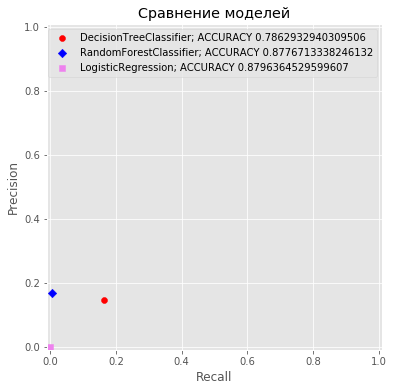

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 6))
plt.scatter(recall_score_D, precision_score_D, marker='o', color='red', label='DecisionTreeClassifier; ACCURACY ' + str(accuracy_score_D))
plt.scatter(recall_score_R, precision_score_R, marker='D', color='blue', label='RandomForestClassifier; ACCURACY ' + str(accuracy_score_R))
plt.scatter(recall_score_L, precision_score_L, marker='s', color='violet', label='LogisticRegression; ACCURACY ' + str(accuracy_score_L))
plt.legend()
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Сравнение моделей')

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

(-0.01, 1.01)

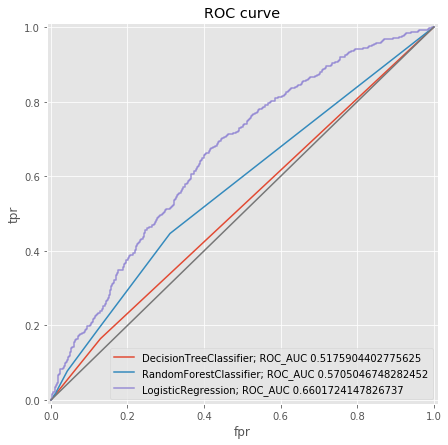

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_D, tpr_D, _ = roc_curve(y_test, predict_proba_D[:,1])
fpr_R, tpr_R, _ = roc_curve(y_test, predict_proba_R[:,1])
fpr_L, tpr_L, _ = roc_curve(y_test, predict_proba_L[:,1])

roc_auc_D = roc_auc_score(y_test, predict_proba_D[:,1])
roc_auc_R = roc_auc_score(y_test, predict_proba_R[:,1])
roc_auc_L = roc_auc_score(y_test, predict_proba_L[:,1])

plt.figure(figsize=(7,7))
plt.plot(fpr_D, tpr_D, label = 'DecisionTreeClassifier; ROC_AUC ' + str(roc_auc_D))
plt.plot(fpr_R, tpr_R, label = 'RandomForestClassifier; ROC_AUC ' + str(roc_auc_R))
plt.plot(fpr_L, tpr_L, label = 'LogisticRegression; ROC_AUC ' + str(roc_auc_L))
plt.plot([0,1], [0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [30]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

In [31]:
D = cross_val_score(model_D, X, y, scoring='roc_auc', cv=10)
print('DecisionTreeClassifier, средний ROC_AUC: ', pd.Series(D).mean()) 

DecisionTreeClassifier, средний ROC_AUC:  0.5193432549715302


In [32]:
R = cross_val_score(model_R, X, y, scoring='roc_auc', cv=10)
print('RandomForestClassifier, средний ROC_AUC: ', pd.Series(R).mean()) 

RandomForestClassifier, средний ROC_AUC:  0.5687373956019431


In [33]:
L = cross_val_score(model_L, X, y, scoring='roc_auc', cv=10)
print('LogisticRegression, средний ROC_AUC: ', pd.Series(L).mean()) 

LogisticRegression, средний ROC_AUC:  0.6177404786015905


**Получается, что по ROC_AUC при кроcсвалидации лучшей моделью является LogisticRegression**. При этом модель достигает своей предсказательной силы если выбирать thresholds меньше 0.5, что наглядено видно на картинки сравнения моделей, где  как раз LogisticRegression совершенно бесполезна при таком пороге (0.5).

In [34]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
predict_proba = model_L.predict_proba(X_test_out)
predict_proba[:, 1]


array([0.09505315, 0.17114118, 0.11740005, ..., 0.13147802, 0.11041205,
       0.19034958])

0.6381393339871582

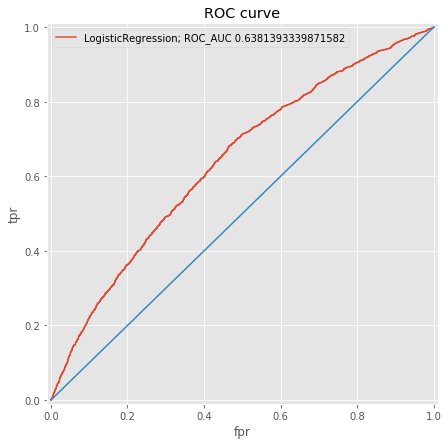

In [35]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

fpr, tpr, _ = roc_curve(y_test_out, predict_proba[:,1])

roc_auc = roc_auc_score(y_test_out, predict_proba[:,1])

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label = 'LogisticRegression; ROC_AUC ' + str(roc_auc))
plt.plot([0,1], [0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

roc_auc

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)